<a href="https://colab.research.google.com/github/adapateja/FML-lab/blob/main/1%2C)SLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import math

In [2]:
#reading data
company_data=pd.read_csv("/content/Company_data.csv")
company_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


<ipython-input-4-8814becbd211>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(company_data['Sales'], bins=30)


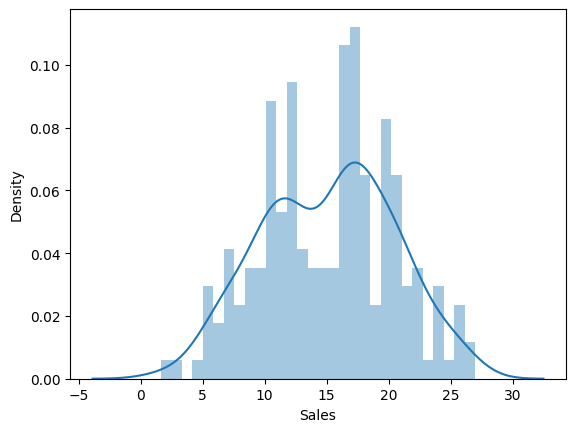

In [4]:
#Showing density of the sales 
sns.distplot(company_data['Sales'], bins=30)
plt.show()

In [5]:
#Finding correlation in order to find which input variable having more relation with output variable
company_corr=company_data.corr()
company_corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


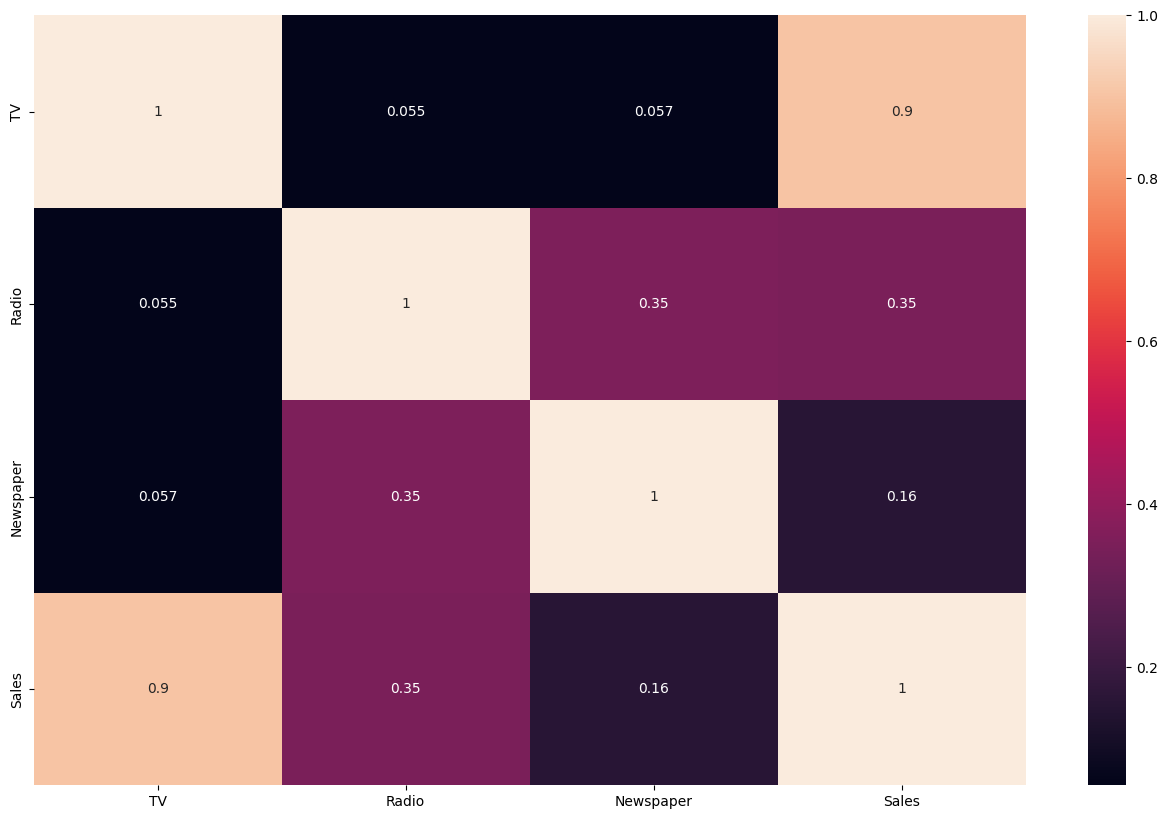

In [6]:
#Showing pictorial view of correlation by a heat map
plt.figure(figsize=(16, 10))
sns.heatmap(company_corr, annot=True)
plt.show()
#Tv and Sales having more correlation so input is TV and output is Sales

In [7]:
#Getting input and Output data
X_input = company_data['TV'].values
y_output = company_data['Sales'].values

In [8]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_input, y_output, test_size=0.25, random_state=0)

In [9]:
#Reshaping the train and test data to fit to the model
X_train=X_train.reshape(-1,1)
y_train=y_train.reshape(-1,1)
X_test=X_test.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 1)
(150, 1)
(50, 1)
(50, 1)


In [11]:
#Building and fittting the model to out data
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
#finding prdected values based on training data
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred_train = model.predict(X_train)

In [23]:
#Caluclating different types of loss for training data
mse = mean_squared_error(y_train, y_pred_train)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r_sqrd=r2_score(y_train, y_pred_train)
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Square Error: {:.2f}".format(rmse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R^2: {:.2f}".format(r_sqrd))

Mean Squared Error: 4.96
Root Mean Square Error: 2.23
Mean Absolute Error: 1.79
R^2: 0.81


In [24]:
#Finding accuracy for training data
accuracy = model.score(X_train, y_train)
print("Accuracy: {:.2f}".format((accuracy)*100))

Accuracy: 81.01


In [22]:
#Finding predicted values for testing data
y_pred_test = model.predict(X_test)

In [27]:
#Finding different types of loss for testing data
mse = mean_squared_error(y_test, y_pred_test)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r_sqrd=r2_score(y_test, y_pred_test)
print("Mean Squared Error: {:.2f}".format(mse))
print("Root Mean Square Error: {:.2f}".format(rmse))
print("Mean Absolute Error: {:.2f}".format(mae))
print("R^2: {:.2f}".format(r_sqrd))

Mean Squared Error: 6.01
Root Mean Square Error: 2.45
Mean Absolute Error: 1.95
R^2: 0.81


In [28]:
#Finding accuracy for testing data
accuracy = model.score(X_test, y_test)
print("Accuracy: {:.2f}".format((accuracy)*100))

Accuracy: 80.54
